In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 10.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [5]:
train = pd.read_csv("~/Downloads/train.csv")
test = pd.read_csv("~/Downloads/test.csv")



In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.columns[train.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
train.isnull().sum().sum()

6965

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.isnull().values.flatten().sum()

6965

In [10]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [11]:
train.isnull().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [12]:
train['LotFrontage'].value_counts() ### missing value with the plot 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

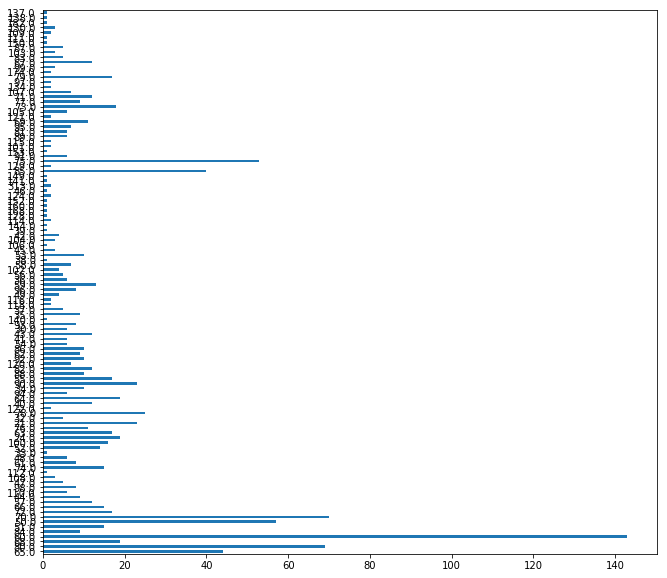

In [13]:
(train['LotFrontage'] ## no effect with missing value 
 .value_counts(sort=False)
 .plot.barh())

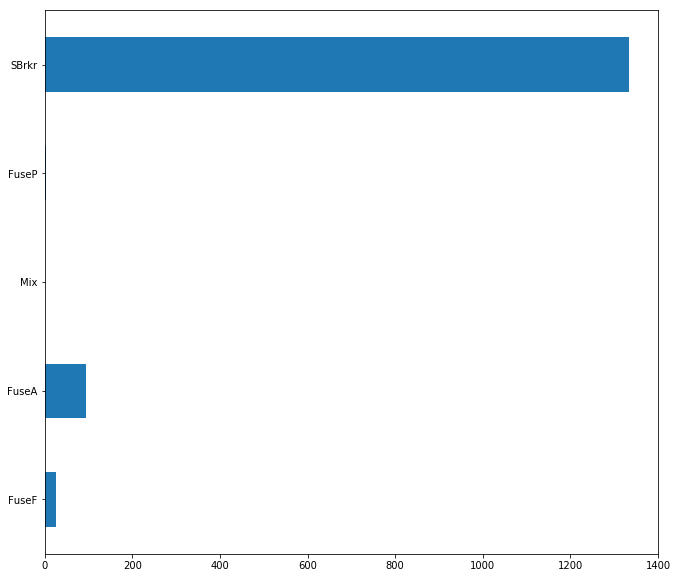

In [14]:
(train['Electrical'] ## plot with missing value 
 .value_counts(sort=False)
 .plot.barh())
 

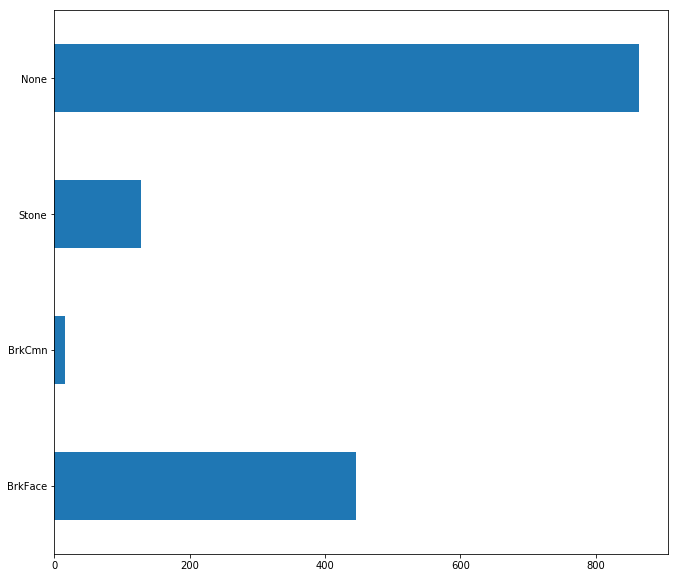

In [15]:
(train['MasVnrType'] ## plot with missing value and with missing value it seems that there is no effect on it 
 .value_counts(sort=False)
 .plot.barh())

In [16]:
train.GarageYrBlt.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
1443    False
1444    False
1445    False
1446    False
1447    False
1448    False
1449     True
1450     True
1451    False
1452    False
1453     True
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageYrBlt, Length: 1460, dtype: bool

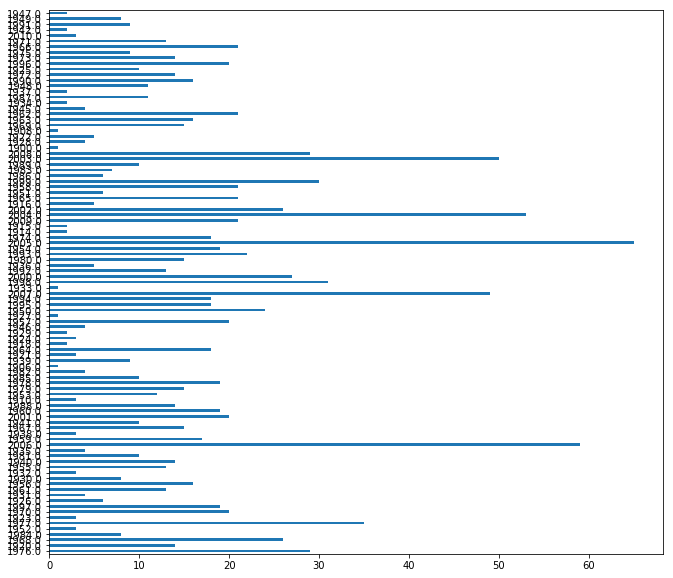

In [17]:
(train['GarageYrBlt'] ## plot with missing value 
 .value_counts(sort=False)
 .plot.barh())
 

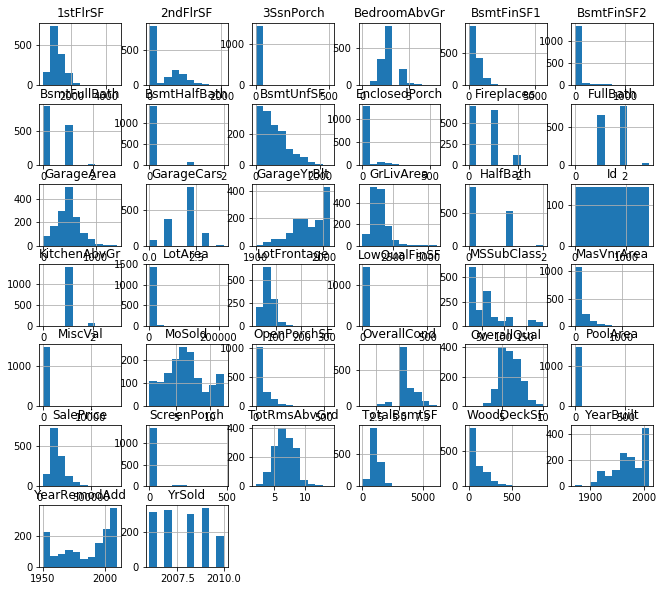

In [18]:
names = ['MSSubClass']
data = train
data.hist()
plt.show()

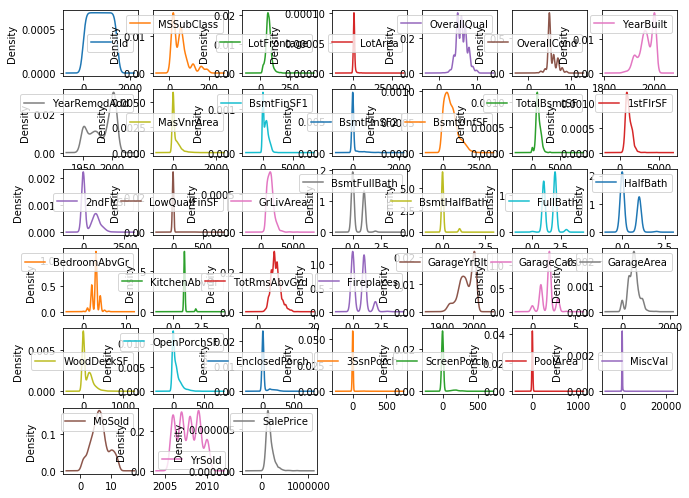

In [19]:
names = ['MSSubClass']
data = train
train.plot(kind='density', subplots=True, layout=(7,7), sharex=False)
plt.show()

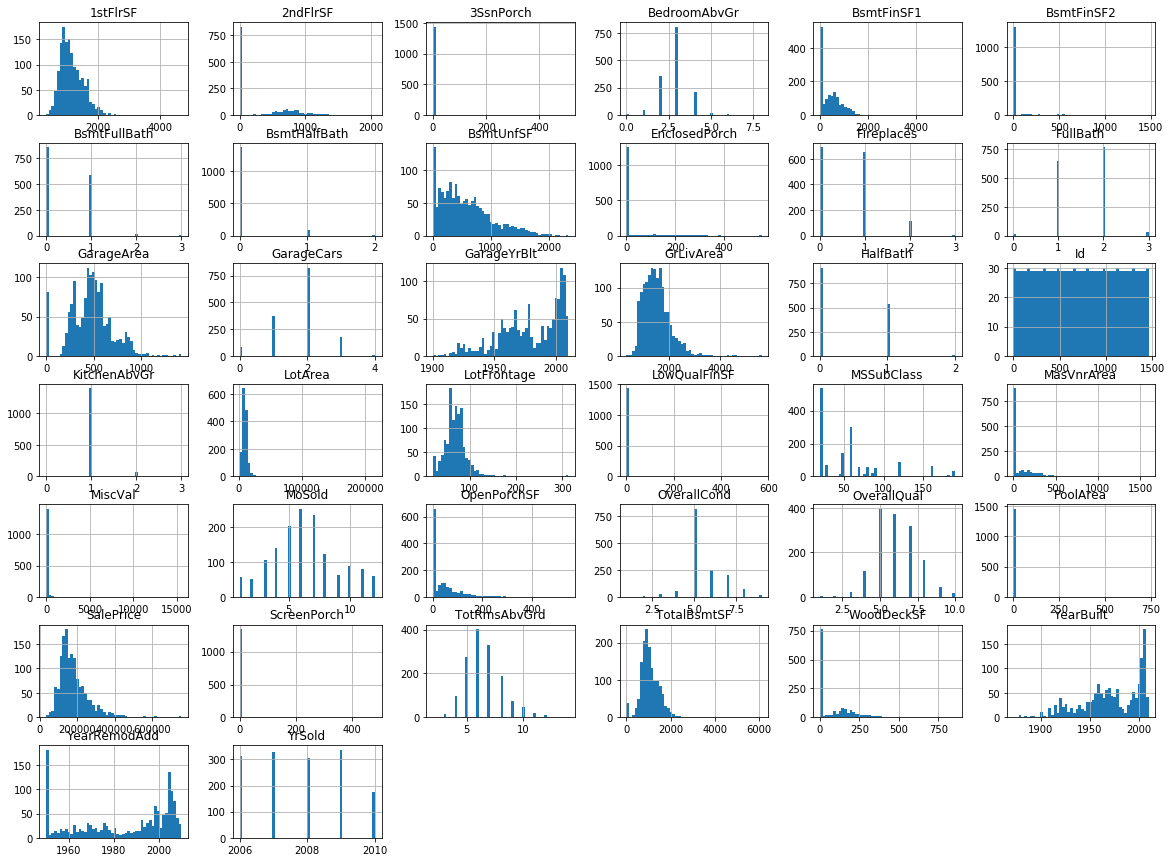

In [36]:
train.hist(bins=50, figsize=(20,15))
plt.show()

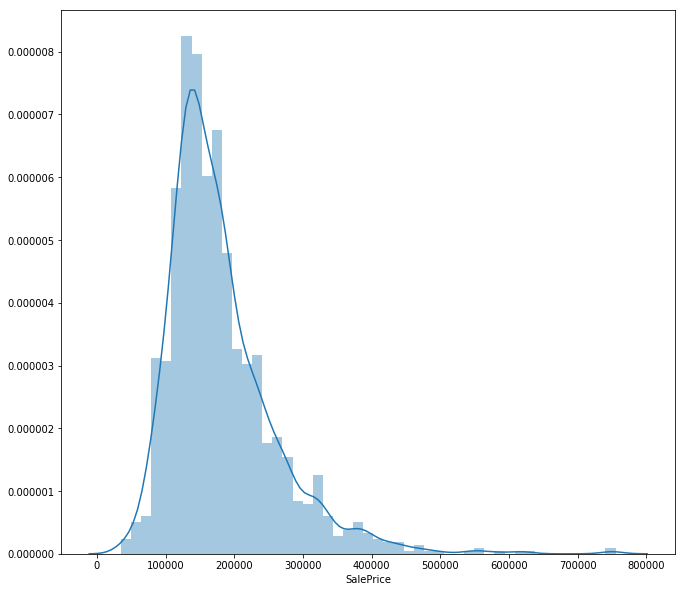

In [37]:
sns.distplot(train['SalePrice']) ## to see saleprice in our dataset it seems right skewed distribution and it means our mean of saleprice is not in center to fix that we have two methods which are 1-log, 2- Quantile Regression Techniques so i will do log to see it gives us normal distribution or not  

In [39]:
train.skew() ## saleprice =  1.882876

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [40]:
saleprice_log = np.log(train['SalePrice'])

In [24]:
saleprice_log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

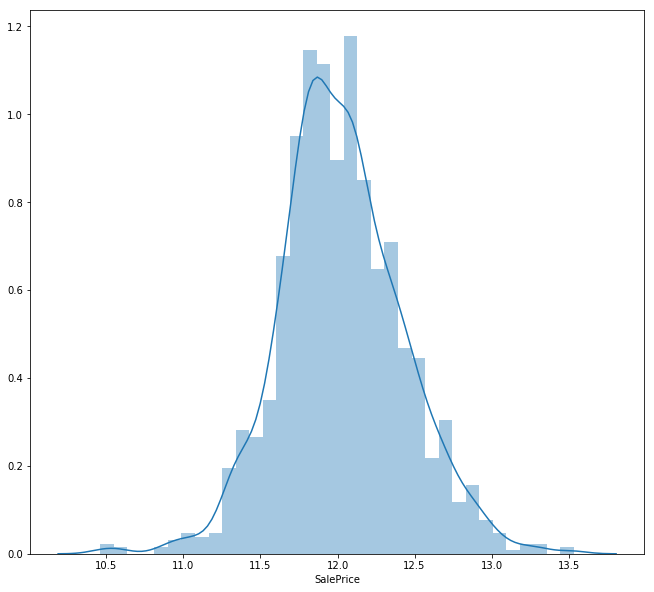

In [41]:
sns.distplot(saleprice_log)

In [42]:
saleprice_log.skew()

0.12133506220520406

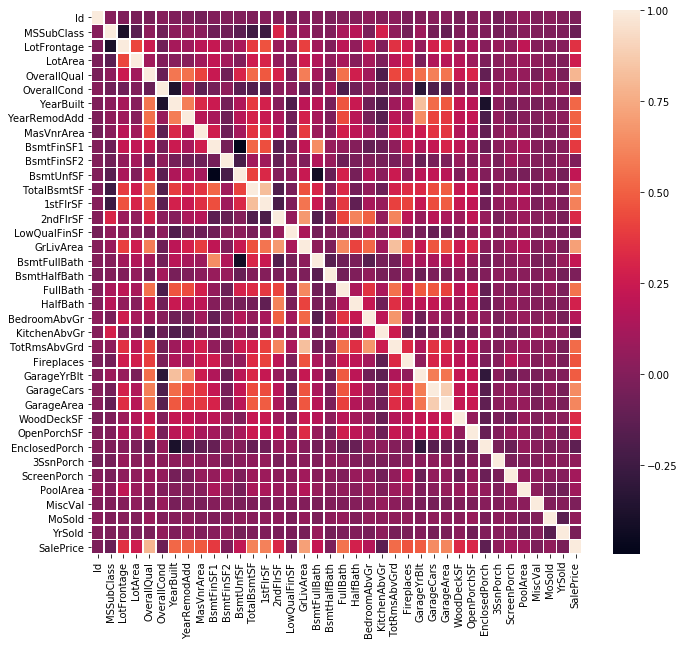

In [43]:
corr = train.corr()
sns.heatmap(corr,linewidths=.5)

        

In [45]:
correlationMatrix = train.corr()


In [46]:
correlationMatrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [47]:
train.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,0.011,-0.011,-0.033,-0.028,0.013,-0.013,-0.022,-0.05,-0.005,-0.006,-0.0079,-0.015,0.01,0.0056,-0.044,0.0083,0.0023,-0.02,0.0056,0.0068,0.038,0.003,0.027,-0.02,7.2e-05,0.017,0.018,-0.03,-0.00048,0.0029,-0.047,0.0013,0.057,-0.0062,0.021,0.00071,-0.022
MSSubClass,0.011,1.0,-0.39,-0.14,0.033,-0.059,0.028,0.041,0.023,-0.07,-0.066,-0.14,-0.24,-0.25,0.31,0.046,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.04,-0.046,0.085,-0.04,-0.099,-0.013,-0.0061,-0.012,-0.044,-0.026,0.0083,-0.0077,-0.014,-0.021,-0.084
LotFrontage,-0.011,-0.39,1.0,0.43,0.25,-0.059,0.12,0.089,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.038,0.4,0.1,-0.0072,0.2,0.054,0.26,-0.0061,0.35,0.27,0.07,0.29,0.34,0.089,0.15,0.011,0.07,0.041,0.21,0.0034,0.011,0.0074,0.35
LotArea,-0.033,-0.14,0.43,1.0,0.11,-0.0056,0.014,0.014,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,-0.025,0.15,0.18,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.0012,-0.014,0.26
OverallQual,-0.028,0.033,0.25,0.11,1.0,-0.092,0.57,0.55,0.41,0.24,-0.059,0.31,0.54,0.48,0.3,-0.03,0.59,0.11,-0.04,0.55,0.27,0.1,-0.18,0.43,0.4,0.55,0.6,0.56,0.24,0.31,-0.11,0.03,0.065,0.065,-0.031,0.071,-0.027,0.79
OverallCond,0.013,-0.059,-0.059,-0.0056,-0.092,1.0,-0.38,0.074,-0.13,-0.046,0.04,-0.14,-0.17,-0.14,0.029,0.025,-0.08,-0.055,0.12,-0.19,-0.061,0.013,-0.087,-0.058,-0.024,-0.32,-0.19,-0.15,-0.0033,-0.033,0.07,0.026,0.055,-0.002,0.069,-0.0035,0.044,-0.078
YearBuilt,-0.013,0.028,0.12,0.014,0.57,-0.38,1.0,0.59,0.32,0.25,-0.049,0.15,0.39,0.28,0.01,-0.18,0.2,0.19,-0.038,0.47,0.24,-0.071,-0.17,0.096,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.031,-0.05,0.0049,-0.034,0.012,-0.014,0.52
YearRemodAdd,-0.022,0.041,0.089,0.014,0.55,0.074,0.59,1.0,0.18,0.13,-0.068,0.18,0.29,0.24,0.14,-0.062,0.29,0.12,-0.012,0.44,0.18,-0.041,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.045,-0.039,0.0058,-0.01,0.021,0.036,0.51
MasVnrArea,-0.05,0.023,0.19,0.1,0.41,-0.13,0.32,0.18,1.0,0.26,-0.072,0.11,0.36,0.34,0.17,-0.069,0.39,0.085,0.027,0.28,0.2,0.1,-0.038,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.019,0.061,0.012,-0.03,-0.006,-0.0082,0.48
BsmtFinSF1,-0.005,-0.07,0.23,0.21,0.24,-0.046,0.25,0.13,0.26,1.0,-0.05,-0.5,0.52,0.45,-0.14,-0.065,0.21,0.65,0.067,0.059,0.0043,-0.11,-0.081,0.044,0.26,0.15,0.22,0.3,0.2,0.11,-0.1,0.026,0.062,0.14,0.0036,-0.016,0.014,0.39


In [48]:
##overallqual , Totalbsmtsf, 1stflrsf, Grlivearea, Garagecars, Garagearea
##0.7>>> corr_matrix["median_house_value"].sort_values(ascending=False)9, 0.61 , 0.61, 0.71, 0.64, 0.62

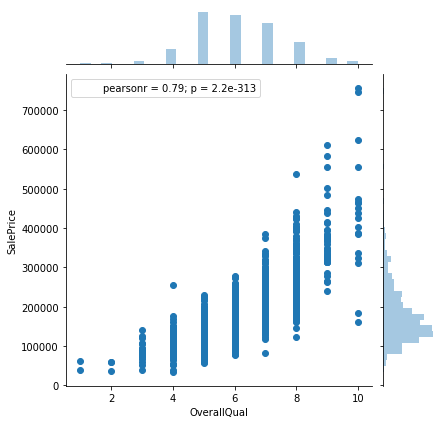

In [49]:
sns.jointplot(x=train["OverallQual"], y=train["SalePrice"], kind='scatter')

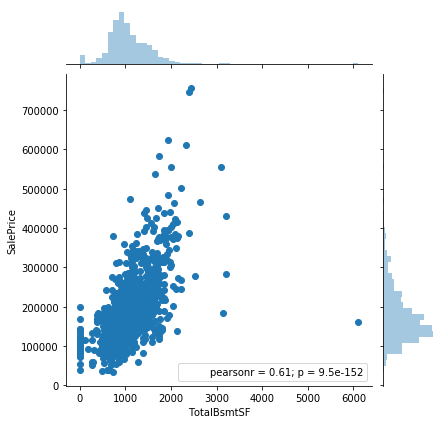

In [50]:
sns.jointplot(x=train["TotalBsmtSF"], y=train["SalePrice"], kind='scatter')

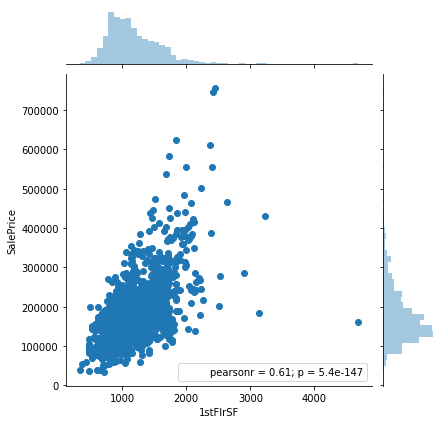

In [51]:
#1stFlrSF
sns.jointplot(x=train["1stFlrSF"], y=train["SalePrice"], kind='scatter')

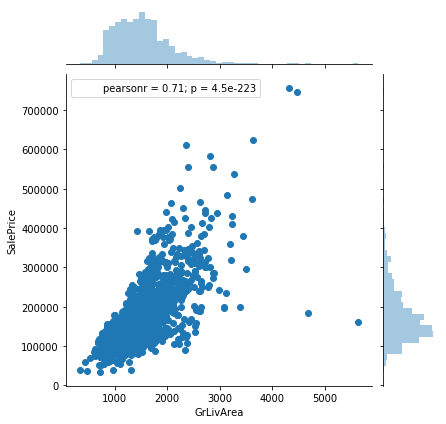

In [52]:
sns.jointplot(x=train["GrLivArea"], y=train["SalePrice"], kind='scatter')

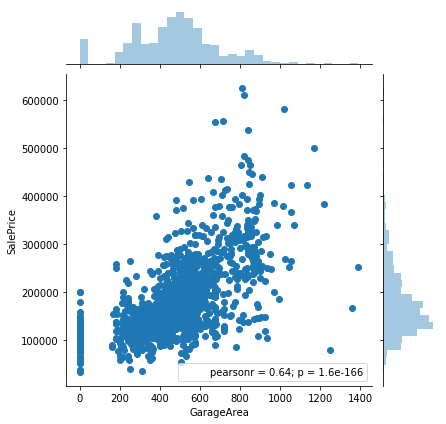

In [73]:
sns.jointplot(x=train["GarageArea"], y=train["SalePrice"], kind='scatter')

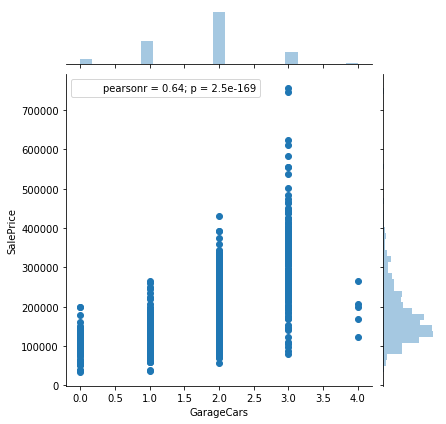

In [54]:
sns.jointplot(x=train["GarageCars"], y=train["SalePrice"], kind='scatter')

In [25]:
categorical = train.select_dtypes(exclude=[np.number])

In [43]:
categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [57]:
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [38]:
pivottable4 = train.pivot_table(index='Street', values='SalePrice', aggfunc=np.median)

In [39]:
pivottable4

,SalePrice
Street,
Grvl,114250
Pave,163000


In [36]:
pivottable3 = train.pivot_table(index='Alley', values='SalePrice', aggfunc=np.median)
pivottable3

,SalePrice
Alley,
Grvl,119500
Pave,172500


In [21]:
pivottable = train.pivot_table(index=["LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1"], values='SalePrice', aggfunc=np.median)
pivottable

SalePrice
LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1           
IR1      Bnk         AllPub    Corner    Gtl       BrkSide      Norm         110000.0
                                                   Edwards      Norm         159500.0
                                                   OldTown      Norm         144000.0
                                         Mod       OldTown      Artery        95000.0
                                                                Feedr         52500.0
                               Inside    Gtl       BrkSide      Norm         147750.0
                                                                PosN         214500.0
                                                   ClearCr      Norm         200500.0
                                                   Crawfor      Norm         177500.0
                                                   Edwards      PosN         184750.0
                                                   NAmes        Norm         159000.0
                                                   OldTown      Feedr         87000.0
                                                                RRAn         140000.0
                                         Mod       Crawfor      Norm         191000.0
                                                   Gilbert      Norm         164000.0
                                         Sev       Timber       Norm         160000.0
         HLS         AllPub    Corner    Gtl       Gilbert      Norm         320000.0
                                                   StoneBr      Norm         377426.0
                                                   Timber       Norm         253981.5
                                         Mod       Crawfor      Norm         225000.0
                                         Sev       Timber       Norm         228950.0
                               CulDSac   Gtl       Gilbert      Norm         240000.0
                               FR2       Gtl       Gilbert      Norm         185000.0
                               Inside    Gtl       Crawfor      Norm         160000.0
                                                   Gilbert      Norm         169000.0
                                                   NridgHt      Norm         374000.0
                                                   OldTown      Feedr        125000.0
                                                   StoneBr      Norm         184500.0
                                                   Timber       Norm         265900.0
                                         Mod       ClearCr      Feedr        200000.0
...                                                                               ...
Reg      Lvl         AllPub    Inside    Gtl       NWAmes       Feedr        167250.0
                                                                Norm         176750.0
                                                                PosA         190000.0
                                                                PosN         278000.0
                                                                RRAn         166950.0
                                                   NoRidge      Norm         337000.0
                                                   NridgHt      Norm         315906.5
                                                                PosN         385000.0
                                                   OldTown      Artery       127200.0
                                                                Feedr        140000.0
                                                                Norm         117000.0
                                                   SWISU        Feedr        169000.0
                                                                Norm         136225.0
                                                   Sawyer       Feedr        118500.0
                                  

In [12]:
pivottable1 = train.pivot_table(index=["SaleCondition","Neighborhood"], values='SalePrice', aggfunc=np.median)
pivottable1

SalePrice
SaleCondition Neighborhood           
Abnorml       BrDale          91500.0
              BrkSide        100000.0
              ClearCr        185000.0
              CollgCr        193000.0
              Crawfor        217000.0
              Edwards        108500.0
              Gilbert        181000.0
              IDOTRR          68400.0
              MeadowV         92000.0
              Mitchel         93500.0
              NAmes          129000.0
              NPkVill        140000.0
              NWAmes         166500.0
              NoRidge        300000.0
              OldTown        101000.0
              SWISU          159434.0
              Sawyer         158900.0
              SawyerW        181250.0
              Somerst        159250.0
              StoneBr        187500.0
              Timber         175000.0
AdjLand       Edwards        104000.0
Alloca        Crawfor        279862.0
              Edwards        226985.0
              IDOTRR          55993.0
              Mitchel        206300.0
              OldTown         89471.0
              Sawyer         108959.0
              SawyerW        130958.5
Family        BrDale          88000.0
...                               ...
Normal        Gilbert        181000.0
              IDOTRR         110000.0
              MeadowV         87000.0
              Mitchel        152200.0
              NAmes          142000.0
              NPkVill        146500.0
              NWAmes         188750.0
              NoRidge        301500.0
              NridgHt        277500.0
              OldTown        122000.0
              SWISU          138475.0
              Sawyer         135000.0
              SawyerW        185950.0
              Somerst        215200.0
              StoneBr        245000.0
              Timber         217450.0
              Veenker        218000.0
Partial       Blmngtn        194201.0
              ClearCr        143000.0
              CollgCr        203950.0
              Crawfor        392500.0
              Edwards        157500.0
              Gilbert        179602.5
              Mitchel        147000.0
              NridgHt        356147.0
              OldTown        114000.0
              SawyerW        158000.0
              Somerst        229456.0
              StoneBr        393216.0
              Timber         269500.0

[76 rows x 1 columns]

In [63]:
pivottable2 = train.pivot_table(index='Neighborhood', values='SalePrice', aggfunc=np.median)
pivottable2

,SalePrice
Neighborhood,
Blmngtn,191000
Blueste,137500
BrDale,106000
BrkSide,124300
ClearCr,200250
CollgCr,197200
Crawfor,200624
Edwards,121750
Gilbert,181000


In [64]:
model = smf.ols(formula='SalePrice ~ SaleCondition', data=train)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     45.58
Date:                Sun, 05 Nov 2017   Prob (F-statistic):           7.99e-44
Time:                        19:53:33   Log-Likelihood:                -18438.
No. Observations:                1460   AIC:                         3.689e+04
Df Residuals:                    1454   BIC:                         3.692e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [65]:
model = smf.ols(formula='SalePrice ~ Neighborhood', data=train)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Sun, 05 Nov 2017   Prob (F-statistic):          1.56e-225
Time:                        19:53:34   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

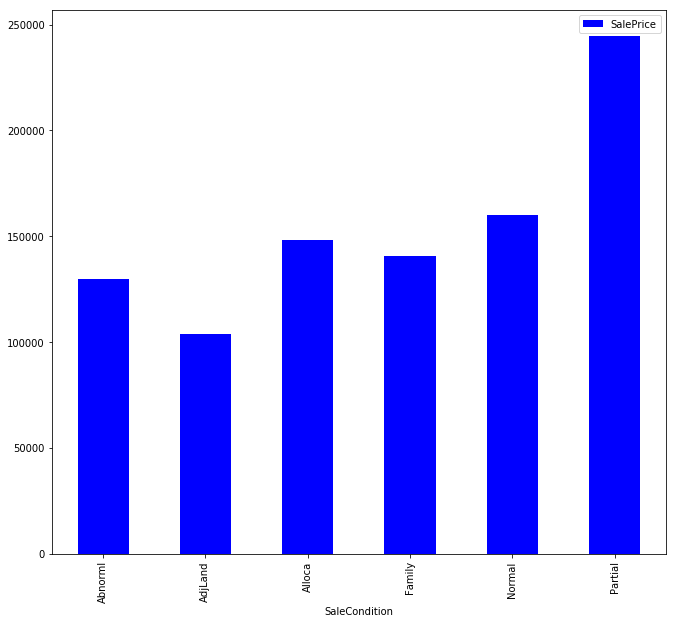

In [66]:
pivottable1.plot(kind='bar',color='blue')

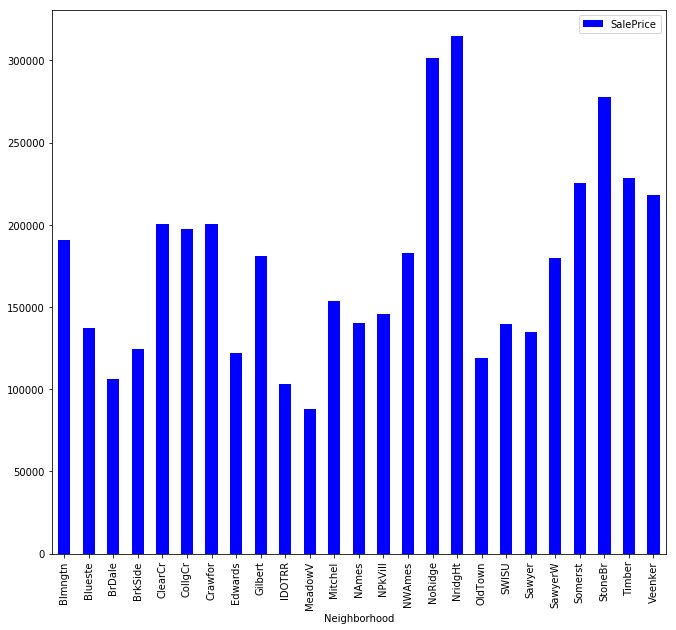

In [67]:
pivottable2.plot(kind='bar',color='blue')

In [31]:
cat_type = [f for f in train.columns if train.dtypes[f] == 'object']
cat_type

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [47]:
melted_df = pd.melt(train, 
                    id_vars=["SalePrice"], # Variables to keep
                    var_name=("cat_type")) # Name of melted variable
melted_df

,SalePrice,cat_type,value
0,208500,Id,1
1,181500,Id,2
2,223500,Id,3
3,140000,Id,4
4,250000,Id,5
5,143000,Id,6
6,307000,Id,7
7,200000,Id,8
8,129900,Id,9
9,118000,Id,10


In [ ]:
#g

In [80]:
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)
train.shape 

(1456, 81)

In [83]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [90]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,AllPub,...,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal
1,1462.0,20.0,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,Gar2,12500.0,6.0,2010.0,WD,Normal
2,1463.0,60.0,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal
3,1464.0,60.0,RL,78.0,9978.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal
4,1465.0,120.0,RL,43.0,5005.0,Pave,NaN,IR1,HLS,AllPub,...,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal


In [91]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [128]:
all_data1 = train.append(test)

In [116]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1455,2916.0,160.0,RM,21.0,1894.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,4.0,2006.0,WD,Abnorml
1456,2917.0,20.0,RL,160.0,20000.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2006.0,WD,Abnorml
1457,2918.0,85.0,RL,62.0,10441.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,Shed,700.0,7.0,2006.0,WD,Normal
1458,2919.0,60.0,RL,74.0,9627.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,11.0,2006.0,WD,Normal
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
train.shape

(1460, 81)

In [125]:
test=test.drop(test.index[len(test)-1])

In [126]:
test.shape

(1459, 80)

In [134]:
def impute(all_data1):
    

    # PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
    all_data1["PoolQC"] = all_data1["PoolQC"].fillna("None")

    # MiscFeature : data description says NA means "no misc feature"
    all_data1["MiscFeature"] = all_data1["MiscFeature"].fillna("None")

    # Alley : data description says NA means "no alley access"
    all_data1["Alley"] = all_data1["Alley"].fillna("None")

    # Fence : data description says NA means "no fence"
    all_data1["Fence"] = all_data1["Fence"].fillna("None")

    # FireplaceQu : data description says NA means "no fireplace"
    all_data1["FireplaceQu"] = all_data1["FireplaceQu"].fillna("None")

    # LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
    # Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
    all_data1["LotFrontage"] = all_data1.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

    # GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        all_data1[col] = all_data1[col].fillna('None')

    # GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        all_data1[col] = all_data1[col].fillna(0)

    # BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        all_data1[col] = all_data1[col].fillna(0)

    # BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        all_data1[col] = all_data1[col].fillna('None')

    # MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
    all_data1["MasVnrType"] = all_data1["MasVnrType"].fillna("None")
    all_data1["MasVnrArea"] = all_data1["MasVnrArea"].fillna(0)

    # MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
    all_data1['MSZoning'] = all_data1['MSZoning'].fillna(all_data1['MSZoning'].mode()[0])

    # Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
    all_data1 = all_data1.drop(['Utilities'], axis=1)

    # Functional : data description says NA means typical
    all_data1["Functional"] = all_data1["Functional"].fillna("Typ")

    # Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
    all_data1['Electrical'] = all_data1['Electrical'].fillna(all_data1['Electrical'].mode()[0])

    # KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
    all_data1['KitchenQual'] = all_data1['KitchenQual'].fillna(all_data1['KitchenQual'].mode()[0])

    # Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
    all_data1['Exterior1st'] = all_data1['Exterior1st'].fillna(all_data1['Exterior1st'].mode()[0])
    all_data1['Exterior2nd'] = all_data1['Exterior2nd'].fillna(all_data1['Exterior2nd'].mode()[0])

    # SaleType : Fill in again with most frequent which is "WD"
    all_data1['SaleType'] = all_data1['SaleType'].fillna(all_data1['SaleType'].mode()[0])

    # MSSubClass : Na most likely means No building class. We can replace missing values with None
    all_data1['MSSubClass'] = all_data1['MSSubClass'].fillna("None")
    
    # Adding total sqfootage feature 
    all_data1['TotalSF'] = all_data1['TotalBsmtSF'] + all_data1['1stFlrSF'] + all_data1['2ndFlrSF']

    # Transforming some numerical variables that are really categorical

    #MSSubClass=The building class
    all_data1['MSSubClass'] = all_data1['MSSubClass'].apply(str)

    #Changing OverallCond into a categorical variable
    all_data1['OverallCond'] = all_data1['OverallCond'].astype(str)

    #Year and month sold are transformed into categorical features.
    all_data1['YrSold'] = all_data1['YrSold'].astype(str)
    all_data1['MoSold'] = all_data1['MoSold'].astype(str)

    return all_data1


In [135]:
all_data2 = impute(all_data1)

In [202]:
all_data3 = impute(all_data1)

In [234]:
all_data2 = pd.get_dummies(all_data2)

In [236]:
all_data2.shape

(2919, 341)

In [137]:
all_data2['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
5       1993.0
6       2004.0
7       1973.0
8       1931.0
9       1939.0
10      1965.0
11      2005.0
12      1962.0
13      2006.0
14      1960.0
15      1991.0
16      1970.0
17      1967.0
18      2004.0
19      1958.0
20      2005.0
21      1930.0
22      2002.0
23      1976.0
24      1968.0
25      2007.0
26      2005.0
27      2008.0
28      1957.0
29      1920.0
         ...  
1429    1925.0
1430    1957.0
1431       0.0
1432       0.0
1433       0.0
1434    2005.0
1435    2004.0
1436    1979.0
1437    1978.0
1438    2001.0
1439    1975.0
1440    1958.0
1441    2000.0
1442    2005.0
1443    2005.0
1444    1951.0
1445    1997.0
1446    1977.0
1447    1968.0
1448    1970.0
1449       0.0
1450    1972.0
1451    1969.0
1452    1970.0
1453       0.0
1454       0.0
1455    1970.0
1456    1960.0
1457       0.0
1458    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64

In [94]:
#all_data1.loc[1431,'GarageFinish']

1431    RFn
1431    NaN
Name: GarageFinish, dtype: object

In [16]:
#np.nanmedian(test['GarageYrBlt'])

1979.0

In [35]:
#print(encoder.classes_)

['C (all)' 'FV' 'RH' 'RL' 'RM']


In [38]:
#print(encoder.classes_)

['C (all)' 'FV' 'RH' 'RL' 'RM']


In [39]:
#all_data = pd.get_dummies(all_data)

In [40]:
#all_data = all_data.fillna(all_data.mean())

In [42]:
#X_train = all_data[:train.shape[0]]
#X_test = all_data[train.shape[0]:]
#y = train.SalePrice


In [139]:
all_data2['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [140]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
# print(“Missing values per column:“)
#print(all_data2.apply(num_missing, axis=0).sort_values(axis=0,ascending=False)) 

#Applying per row:
#print(“Missing values per row:“)
#print(all_data.apply(num_missing, axis=1).sort_values(axis=0,ascending=False))

1458    0
979     0
977     0
976     0
975     0
974     0
973     0
972     0
971     0
970     0
969     0
968     0
967     0
966     0
965     0
964     0
963     0
962     0
961     0
960     0
959     0
978     0
980     0
957     0
981     0
1000    0
999     0
998     0
997     0
996     0
       ..
463     0
462     0
461     0
460     0
459     0
458     0
457     0
476     0
477     0
478     0
489     0
497     0
496     0
495     0
494     0
493     0
492     0
491     0
490     0
488     0
479     0
487     0
486     0
485     0
484     0
483     0
482     0
481     0
480     0
0       0
Length: 2919, dtype: int64


In [233]:
all_data2.keys()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Street_Grvl',
       'Street_Pave', 'YrSold_2006.0', 'YrSold_2007.0', 'YrSold_2008.0',
       'YrSold_2009.0', 'YrSold_2010.0'],
      dtype='object', length=341)

In [64]:
all_data['SalePrice']

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
5       143000.00000
6       307000.00000
7       200000.00000
8       129900.00000
9       118000.00000
10      129500.00000
11      345000.00000
12      144000.00000
13      279500.00000
14      157000.00000
15      132000.00000
16      149000.00000
17       90000.00000
18      159000.00000
19      139000.00000
20      325300.00000
21      139400.00000
22      230000.00000
23      129900.00000
24      154000.00000
25      256300.00000
26      134800.00000
27      306000.00000
28      207500.00000
29       68500.00000
            ...     
1429    180921.19589
1430    180921.19589
1431    180921.19589
1432    180921.19589
1433    180921.19589
1434    180921.19589
1435    180921.19589
1436    180921.19589
1437    180921.19589
1438    180921.19589
1439    180921.19589
1440    180921.19589
1441    180921.19589
1442    180921.19589
1443    180921.19589
1444    180921.19589
1445    18092

In [237]:
train_new = all_data2[all_data2['SalePrice'].notnull()]
test_new = all_data2[all_data2['SalePrice'].isnull()]
#train_x = [all_data2['SalePrice'].notnull()]
train_new1 = all_data2[all_data2['SalePrice'].notnull()]

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [238]:
train_x = train_new1['SalePrice']

In [239]:
train_x

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

In [240]:
train_y=train_new1.drop(["SalePrice"], axis=1)


In [241]:
train_y

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0,0,1,0,1,0,0,1,0,0
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0,0,1,0,1,0,1,0,0,0
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0,0,1,0,1,0,0,1,0,0
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0,0,1,0,1,1,0,0,0,0
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0,0,1,0,1,0,0,1,0,0
5,796.0,566.0,320.0,1.0,732.0,0.0,1.0,0.0,64.0,0.0,...,0,0,1,0,1,0,0,0,1,0
6,1694.0,0.0,0.0,3.0,1369.0,0.0,1.0,0.0,317.0,0.0,...,0,0,1,0,1,0,1,0,0,0
7,1107.0,983.0,0.0,3.0,859.0,32.0,1.0,0.0,216.0,228.0,...,0,0,1,0,1,0,0,0,1,0
8,1022.0,752.0,0.0,2.0,0.0,0.0,0.0,0.0,952.0,205.0,...,0,0,1,0,1,0,0,1,0,0
9,1077.0,0.0,0.0,2.0,851.0,0.0,1.0,0.0,140.0,0.0,...,0,0,1,0,1,0,0,1,0,0


In [242]:
#columns = train_new1.columns.tolist()
train_y.shape


(1460, 340)

In [250]:
train_y

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Street_Grvl',
       'Street_Pave', 'YrSold_2006.0', 'YrSold_2007.0', 'YrSold_2008.0',
       'YrSold_2009.0', 'YrSold_2010.0'],
      dtype='object', length=340)

In [213]:
all_data2[all_data2['SalePrice'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0
0,896.0,0.0,0.0,2.0,468.0,144.0,0.0,0.0,270.0,0.0,...,0,0,1,0,1,0,0,0,0,1
1,1329.0,0.0,0.0,3.0,923.0,0.0,0.0,0.0,406.0,0.0,...,0,0,1,0,1,0,0,0,0,1
2,928.0,701.0,0.0,3.0,791.0,0.0,0.0,0.0,137.0,0.0,...,0,0,1,0,1,0,0,0,0,1
3,926.0,678.0,0.0,3.0,602.0,0.0,0.0,0.0,324.0,0.0,...,0,0,1,0,1,0,0,0,0,1
4,1280.0,0.0,0.0,2.0,263.0,0.0,0.0,0.0,1017.0,0.0,...,0,0,1,0,1,0,0,0,0,1
5,763.0,892.0,0.0,3.0,0.0,0.0,0.0,0.0,763.0,0.0,...,0,0,1,0,1,0,0,0,0,1
6,1187.0,0.0,0.0,3.0,935.0,0.0,1.0,0.0,233.0,0.0,...,0,0,1,0,1,0,0,0,0,1
7,789.0,676.0,0.0,3.0,0.0,0.0,0.0,0.0,789.0,0.0,...,0,0,1,0,1,0,0,0,0,1
8,1341.0,0.0,0.0,2.0,637.0,0.0,1.0,0.0,663.0,0.0,...,0,0,1,0,1,0,0,0,0,1
9,882.0,0.0,0.0,2.0,804.0,78.0,1.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1


In [252]:
from sklearn.ensemble import RandomForestRegressor

In [253]:
usa_rf_1 = RandomForestRegressor()

In [254]:
usa_rf_1.fit(train_y, train_x)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [255]:
usa_rf_1.base_estimator

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [256]:
usa_rf_1.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=971888743, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1986089489, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1641653369, splitter='best'),
 DecisionTreeRegress

In [257]:
usa_rf_1.predict(train_y)

array([ 206470. ,  181750. ,  225150. , ...,  269250. ,  137387.5,  148240. ])

In [265]:
importance=usa_rf_1.feature_importances_

In [267]:
importance

array([  4.82621510e-03,   7.76078591e-03,   1.91371553e-04,
         6.64778348e-03,   1.27590544e-02,   3.37589083e-05,
         3.96003966e-04,   1.32529640e-04,   9.87209012e-03,
         3.43389737e-04,   2.38237551e-03,   5.87949752e-04,
         7.35884124e-03,   8.87154722e-03,   7.56110122e-03,
         1.60853879e-02,   3.30393913e-04,   2.10738625e-03,
         5.16879403e-04,   8.76882843e-03,   4.24023166e-03,
         4.03136387e-06,   4.52596908e-03,   3.22791516e-05,
         2.46365721e-03,   3.23931953e-01,   6.54404154e-06,
         2.53239993e-03,   2.55036394e-03,   2.68954930e-03,
         2.19437323e-03,   2.06383185e-02,   8.29769748e-03,
         4.46840829e-01,   1.77391921e-05,   1.54901383e-04,
         9.83055064e-06,   7.55582939e-04,   1.43325245e-05,
         3.55406886e-06,   5.10347015e-06,   9.95259634e-06,
         3.23111421e-04,   1.11700787e-04,   1.60269546e-06,
         0.00000000e+00,   9.26425900e-05,   8.22444608e-05,
         2.58672449e-03,

In [268]:
importance1 = pd.DataFrame(importance,index = train_y.columns,
                          columns=['Importance'])

In [269]:
importance1

,Importance
1stFlrSF,4.826215e-03
2ndFlrSF,7.760786e-03
3SsnPorch,1.913716e-04
BedroomAbvGr,6.647783e-03
BsmtFinSF1,1.275905e-02
BsmtFinSF2,3.375891e-05
BsmtFullBath,3.960040e-04
BsmtHalfBath,1.325296e-04
BsmtUnfSF,9.872090e-03
EnclosedPorch,3.433897e-04
